- In this notebook I have imported all of my data and put it into a dataframe
- This data consists of the stock information for DJIA since 2006
- My goal is to predict whether or not a stock will beat the benchmark for a given year
- I plan to also bring in more data involving whether or not the company had a major release/product update/innovation that year
- Outside data on how the company's balance sheet/incomate statement looked for a given year
- Any major data on deals/news for the year
- Oil price movement for the year
- Dollar strength for the year
- Maybe use less years to more accurately predit recent years movement
- commodity prices
- other currency prices
- trucking/shipping index
- 01/2006 - 12/2017

In [1]:
import numpy as np
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import r2_score



/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import pandas as pd


AABA = "/Users/davidhoffman/desktop/stocks_download/AABA_2006-01-01_to_2018-01-01.csv"
AABA = pd.read_csv(AABA)


In [3]:
AAPL = "/Users/davidhoffman/desktop/stocks_download/AAPL_2006-01-01_to_2018-01-01.csv"
AAPL = pd.read_csv(AAPL)

In [4]:
#retrieving all the csvs
AMZN="/Users/davidhoffman/desktop/stocks_download/AMZN_2006-01-01_to_2018-01-01.csv"
AXP="/Users/davidhoffman/desktop/stocks_download/AXP_2006-01-01_to_2018-01-01.csv"
BA="/Users/davidhoffman/desktop/stocks_download/BA_2006-01-01_to_2018-01-01.csv"
CAT="/Users/davidhoffman/desktop/stocks_download/CAT_2006-01-01_to_2018-01-01.csv"
CSCO="/Users/davidhoffman/desktop/stocks_download/CSCO_2006-01-01_to_2018-01-01.csv"
CVX="/Users/davidhoffman/desktop/stocks_download/CVX_2006-01-01_to_2018-01-01.csv"
DIS="/Users/davidhoffman/desktop/stocks_download/DIS_2006-01-01_to_2018-01-01.csv"
GE="/Users/davidhoffman/desktop/stocks_download/GE_2006-01-01_to_2018-01-01.csv"
GOOGL="/Users/davidhoffman/desktop/stocks_download/GOOGL_2006-01-01_to_2018-01-01.csv"
GS="/Users/davidhoffman/desktop/stocks_download/GS_2006-01-01_to_2018-01-01.csv"
HD="/Users/davidhoffman/desktop/stocks_download/HD_2006-01-01_to_2018-01-01.csv"
IBM="/Users/davidhoffman/desktop/stocks_download/IBM_2006-01-01_to_2018-01-01.csv"
INTC="/Users/davidhoffman/desktop/stocks_download/INTC_2006-01-01_to_2018-01-01.csv"
JPM="/Users/davidhoffman/desktop/stocks_download/JPM_2006-01-01_to_2018-01-01.csv"
KO="/Users/davidhoffman/desktop/stocks_download/KO_2006-01-01_to_2018-01-01.csv"
MCD="/Users/davidhoffman/desktop/stocks_download/MCD_2006-01-01_to_2018-01-01.csv"
MMM="/Users/davidhoffman/desktop/stocks_download/MMM_2006-01-01_to_2018-01-01.csv"
MRK="/Users/davidhoffman/desktop/stocks_download/MRK_2006-01-01_to_2018-01-01.csv"
MSFT="/Users/davidhoffman/desktop/stocks_download/MSFT_2006-01-01_to_2018-01-01.csv"
NKE="/Users/davidhoffman/desktop/stocks_download/NKE_2006-01-01_to_2018-01-01.csv"
PFE="/Users/davidhoffman/desktop/stocks_download/PFE_2006-01-01_to_2018-01-01.csv"
PG="/Users/davidhoffman/desktop/stocks_download/PG_2006-01-01_to_2018-01-01.csv"
TRV="/Users/davidhoffman/desktop/stocks_download/TRV_2006-01-01_to_2018-01-01.csv"
UNH="/Users/davidhoffman/desktop/stocks_download/UNH_2006-01-01_to_2018-01-01.csv"
UTX="/Users/davidhoffman/desktop/stocks_download/UTX_2006-01-01_to_2018-01-01.csv"
VZ="/Users/davidhoffman/desktop/stocks_download/VZ_2006-01-01_to_2018-01-01.csv"
WMT="/Users/davidhoffman/desktop/stocks_download/WMT_2006-01-01_to_2018-01-01.csv"
XOM="/Users/davidhoffman/desktop/stocks_download/XOM_2006-01-01_to_2018-01-01.csv"

#index_col='Date'?

AMZN = pd.read_csv(AMZN)
AXP = pd.read_csv(AXP)
BA = pd.read_csv(BA)
CAT = pd.read_csv(CAT)
CSCO = pd.read_csv(CSCO)
CVX = pd.read_csv(CVX)
DIS = pd.read_csv(DIS)
GE = pd.read_csv(GE)
GOOGLE = pd.read_csv(GOOGL)
GS = pd.read_csv(GS)
HD = pd.read_csv(HD)
IBM = pd.read_csv(IBM)
INTC = pd.read_csv(INTC)
JPM = pd.read_csv(JPM)
KO = pd.read_csv(KO)
MCD = pd.read_csv(MCD)
MMM = pd.read_csv(MMM)
MRK = pd.read_csv(MRK)
MSFT = pd.read_csv(MSFT)
NKE = pd.read_csv(NKE)
PFE = pd.read_csv(PFE)
PG = pd.read_csv(PG)
TRV = pd.read_csv(TRV)
UNH = pd.read_csv(UNH)
UTX = pd.read_csv(UTX)
VZ = pd.read_csv(VZ)
WMT = pd.read_csv(WMT)
XOM = pd.read_csv(XOM)

In [5]:
dfs= (AMZN,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,GE,GOOGLE,GS, HD, 
                    IBM,INTC,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PFE,PG,TRV,UNH,UTX,VZ,WMT,XOM)

In [6]:
#Combining all the individual stock dataframes
stocks = pd.concat((AMZN,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,GE,GOOGLE,GS, HD, IBM,INTC,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PFE,PG,TRV,UNH,UTX,VZ,WMT,XOM))

In [7]:
stocks.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


In [8]:
import matplotlib.pyplot as plt


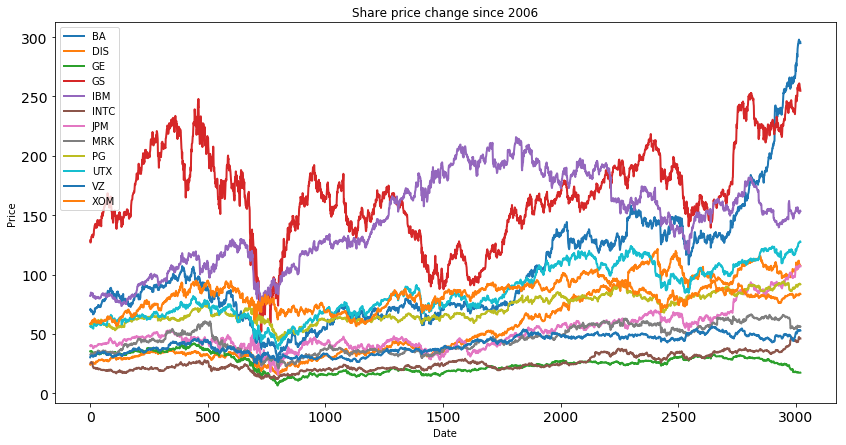

In [118]:
#Closing price chart

plt.figure(figsize=(14,7))
#plt.plot(date_ticks, AMZN.Close, lw=2,label='AMZN')
#plt.plot(date_ticks, AXP.Close, lw=2,label='AXP')
plt.plot(date_ticks, BA.Close, lw=2,label='BA')
#plt.plot(date_ticks, CAT.Close, lw=2,label='CAT')
#plt.plot(date_ticks[1:], CSCO.Close, lw=2,label='CSCO')
plt.plot(date_ticks, DIS.Close, lw=2,label='DIS')
#plt.plot(date_ticks, CVX.Close[1:], lw=2,label='CVX')
plt.plot(date_ticks,GE.Close, lw=2,label='GE')
#plt.plot(date_ticks[1:], GOOGLE.Close, lw=2,label='GOOGL')
plt.plot(date_ticks, GS.Close, lw=2,label='GS')
#plt.plot(date_ticks, HD.Close, lw=2,label='HD')
plt.plot(date_ticks, IBM.Close, lw=2,label='IBM')
plt.plot(date_ticks[1:], INTC.Close, lw=2,label='INTC')
plt.plot(date_ticks, JPM.Close, lw=2,label='JPM')
#plt.plot(date_ticks, KO.Close, lw=2,label='KO')
#plt.plot(date_ticks, MCD.Close, lw=2,label='MCD')
#plt.plot(date_ticks, MMM.Close, lw=2,label='MMM')
plt.plot(date_ticks[1:], MRK.Close, lw=2,label='MRK')
#plt.plot(date_ticks[1:], MSFT.Close, lw=2,label='MSFT')
#plt.plot(date_ticks, NKE.Close, lw=2,label='NKE')
#plt.plot(date_ticks, PFE.Close, lw=2,label='PFE')
plt.plot(date_ticks, PG.Close, lw=2,label='PG')
#plt.plot(date_ticks, TRV.Close, lw=2,label='TRV')
#plt.plot(date_ticks, UNH.Close, lw=2,label='UNH')
plt.plot(date_ticks, UTX.Close, lw=2,label='UTX')
plt.plot(date_ticks, VZ.Close, lw=2,label='VZ')
#plt.plot(date_ticks, WMT.Close, lw=2,label='WMT')
plt.plot(date_ticks, XOM.Close, lw=2,label='XOM')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Share price change since 2006")
plt.tick_params(labelsize=14)
plt.legend()
plt.show()

/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


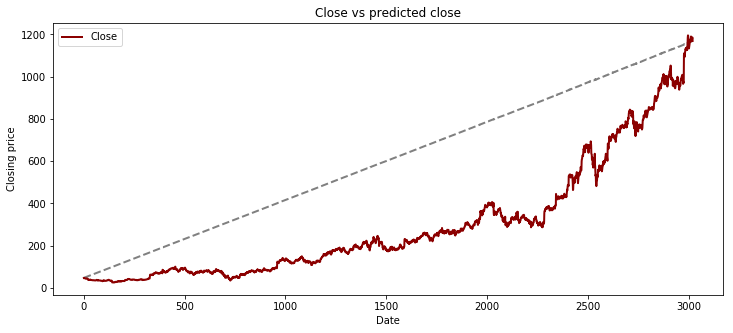

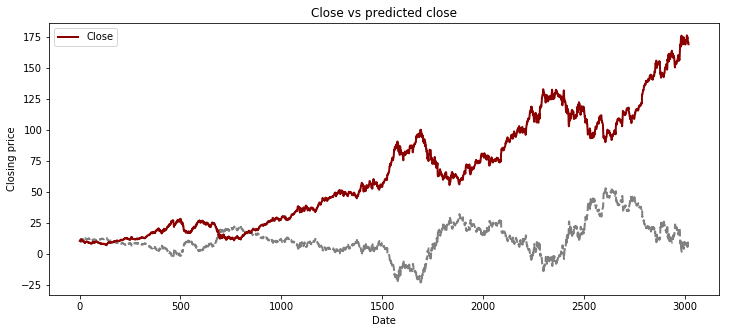

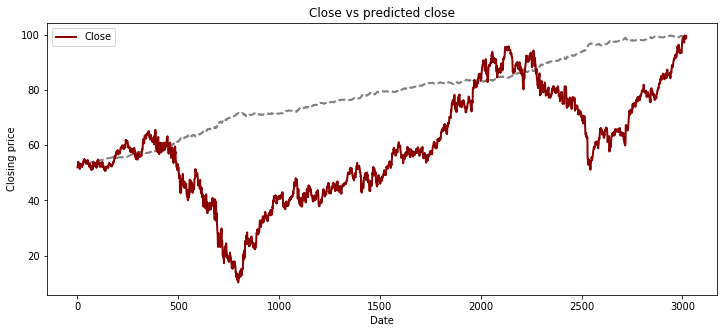

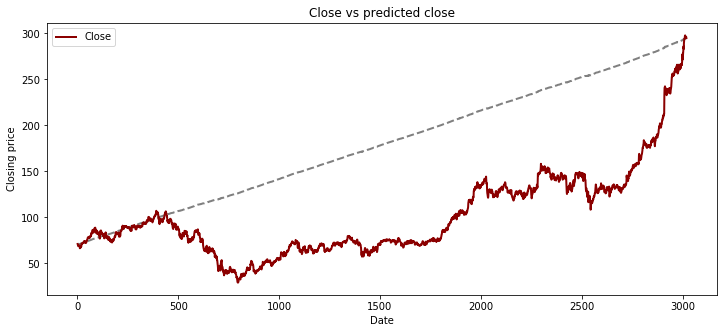

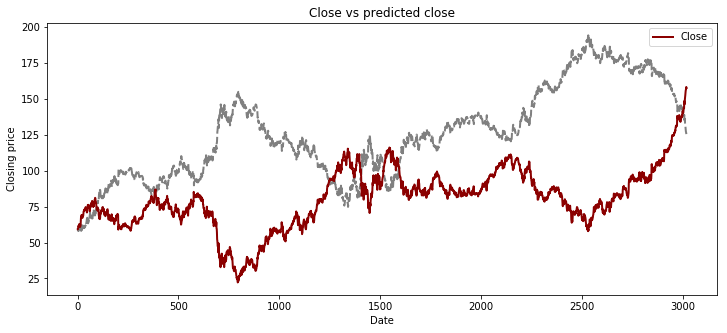

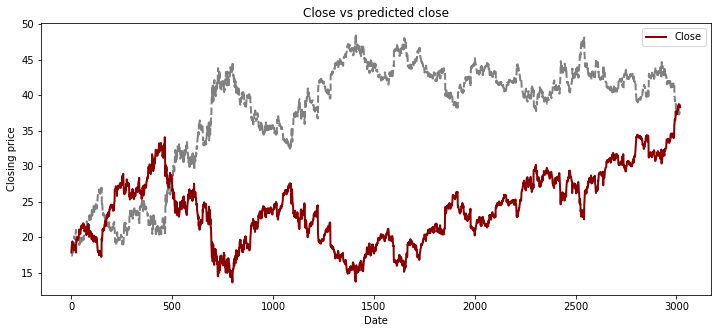

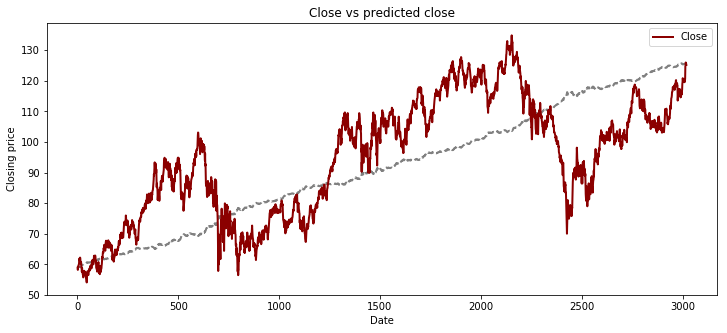

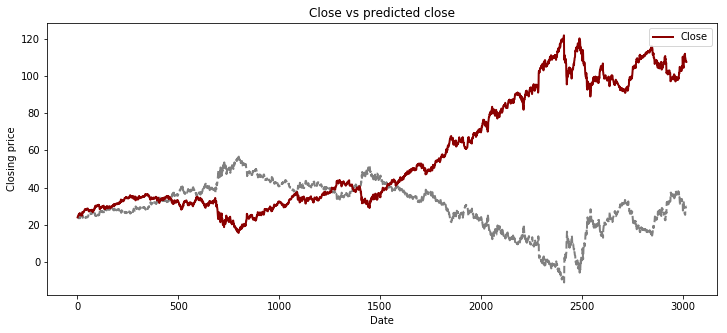

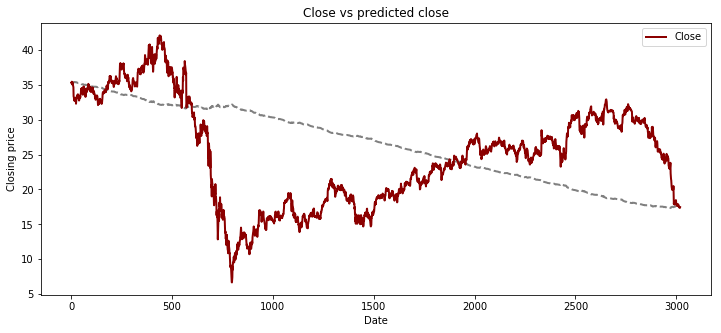

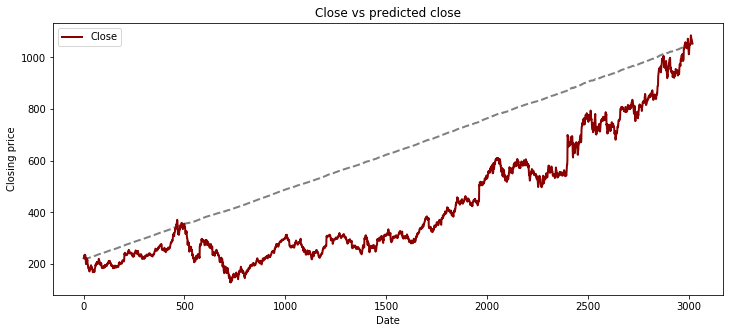

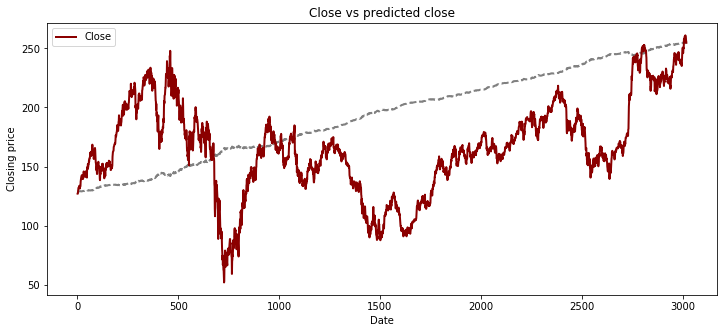

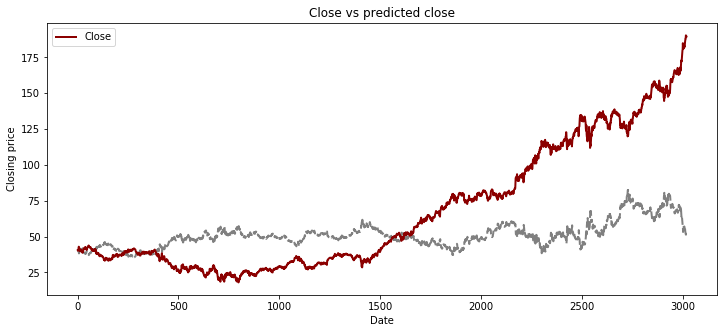

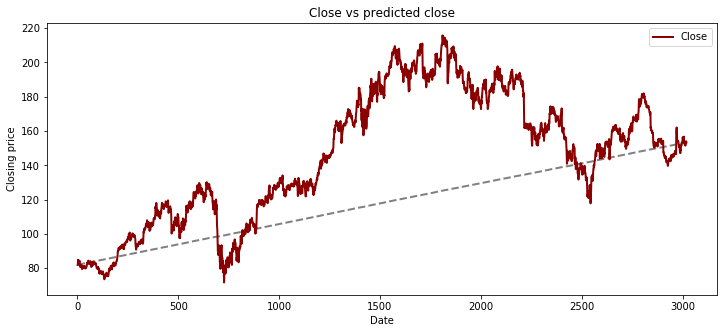

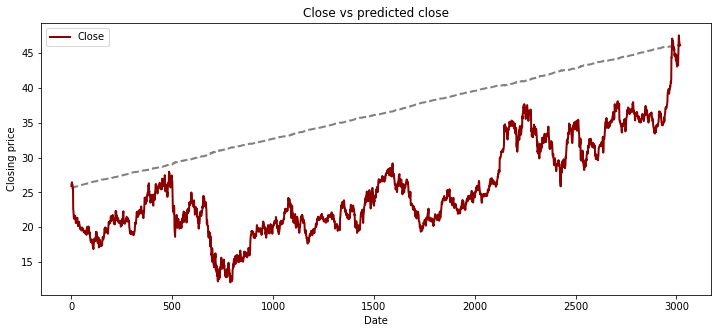

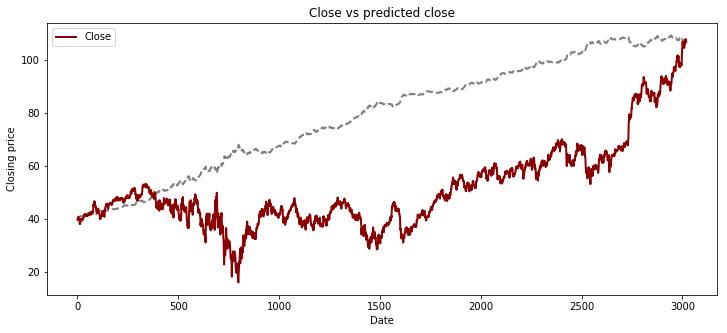

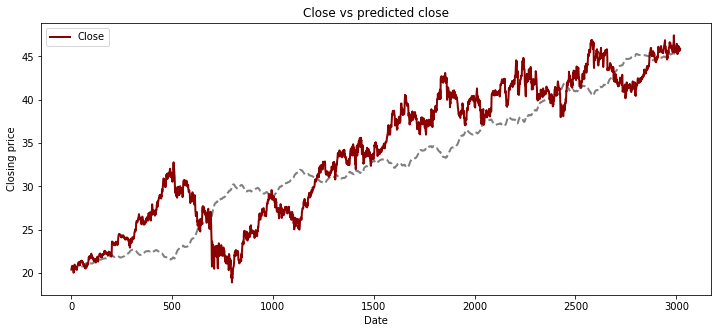

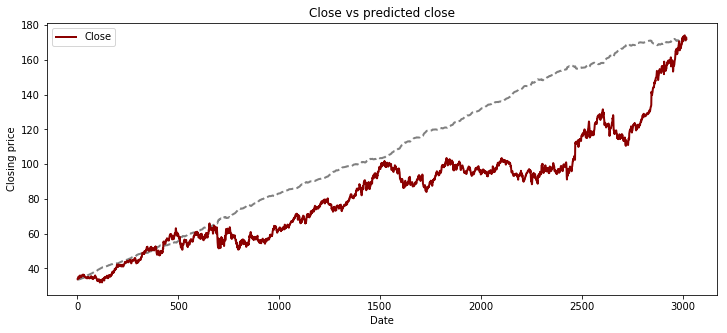

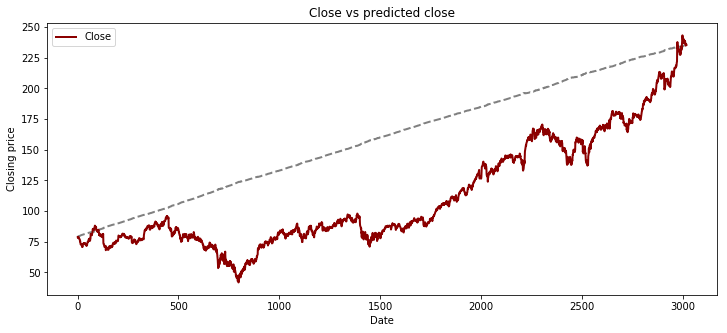

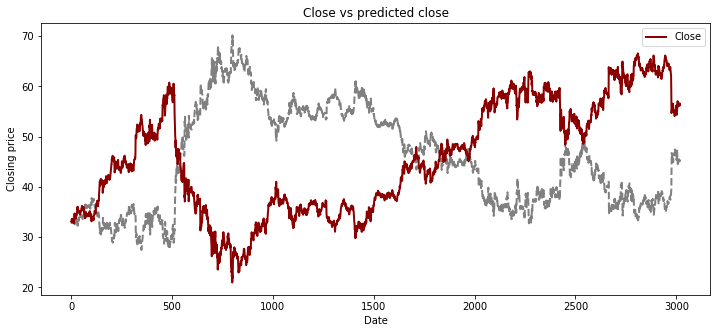

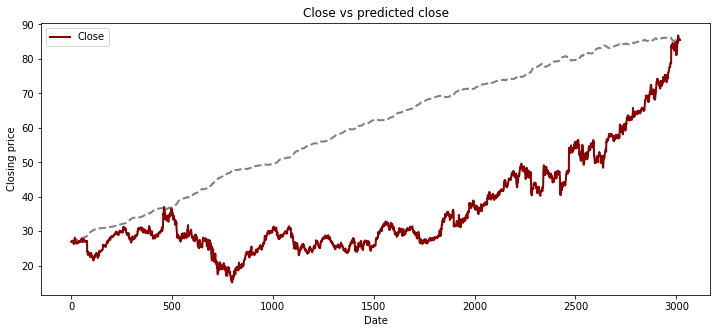

/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:628: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:628: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:629: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:629: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/Users/davidhoffman/ana

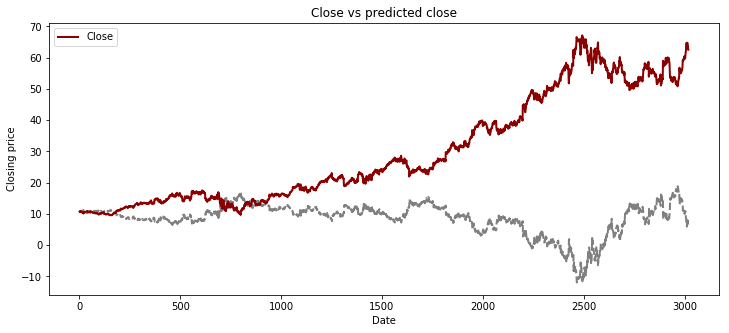

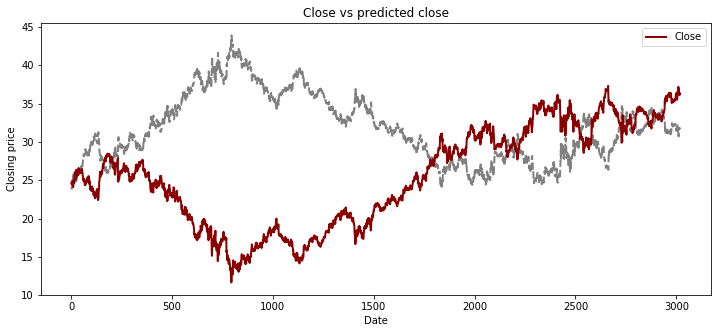

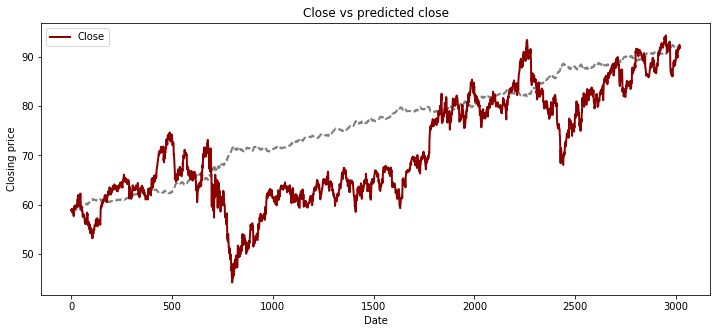

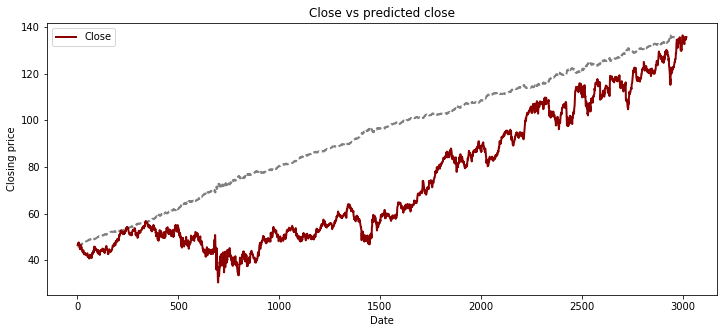

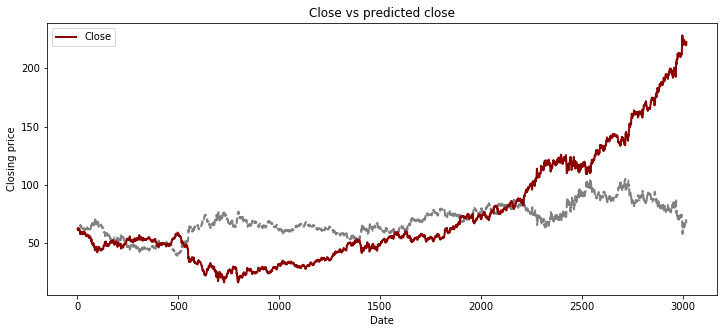

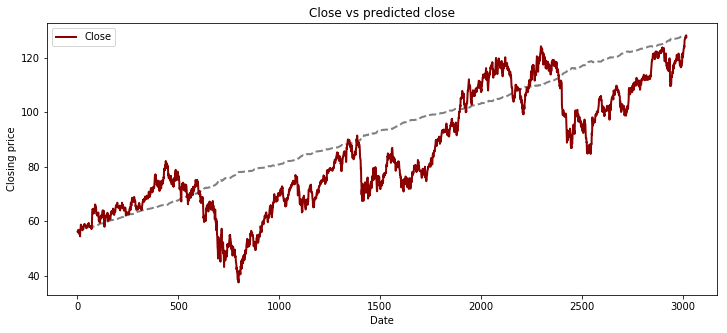

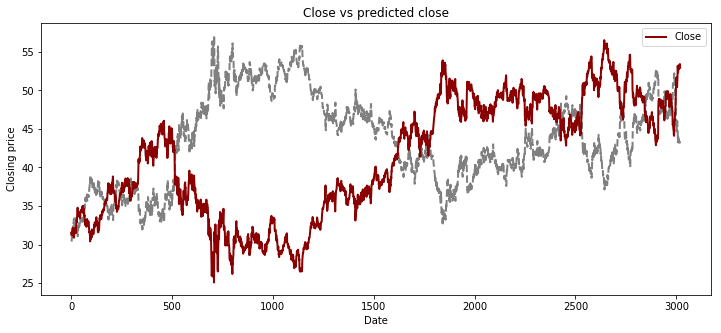

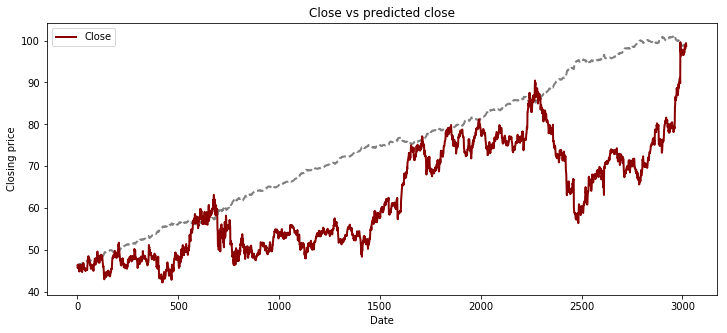

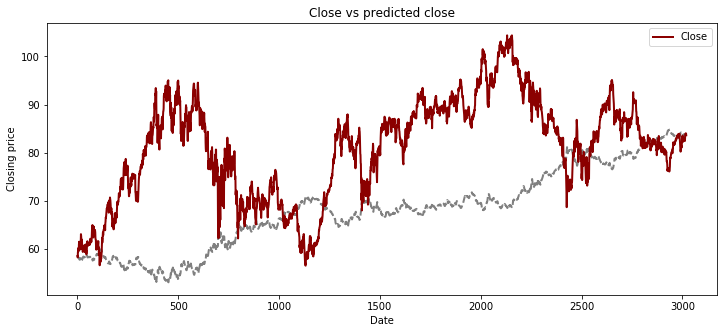

In [73]:
#loop --> graph predictions for each company, in sample

for df in dfs:
    try:
        # ar1 In sample predictions

        #ARIMA model
        ar1ma1 = ARIMA(df.Close.dropna().values, (1,1,1)).fit()


        date_ticks=df.index

        #predictions = ar1.predict()
        full_pred = df.Close.values[0]+np.cumsum(ar1ma1.fittedvalues)

        fig, ax = plt.subplots(figsize=(12,5))
        ax.plot(date_ticks[1:], full_pred, lw=2, color='grey', ls='dashed')
        ax.plot(date_ticks[1:], df.Close[1:], lw=2, color='darkred')
        plt.xlabel("Date")
        plt.ylabel("Closing price")
        plt.title("Close vs predicted close")
        plt.legend()
        plt.show();
    except:
        # ar1 In sample predictions

        #ARIMA model
        ar1ma1 = ARIMA(df.Close.dropna().values, (1,2,1)).fit()


        date_ticks=df.index

        #predictions = ar1.predict()
        full_pred = df.Close.values[0]+np.cumsum(ar1ma1.fittedvalues)

        fig, ax = plt.subplots(figsize=(12,5))
        ax.plot(date_ticks[2:], full_pred, lw=2, color='grey', ls='dashed')
        ax.plot(date_ticks[1:], df.Close[1:], lw=2, color='darkred')
        plt.xlabel("Date")
        plt.ylabel("Closing price")
        plt.title("Close vs predicted close")
        plt.legend()
        plt.show();



In [74]:
#loop --> graph predictions for each company, out of sample
for df in dfs:
    try:
        ar1ma1 = ARIMA(df.Close.dropna().values, (1,1,1)).fit()
        ar1ma1.plot_predict(2019,3025,dynamic=False)
    except:
        pass

/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [75]:
"""for df in dfs:
        ar1ma1 = ARIMA(df.Close.dropna().values, (1,2,1)).fit()
        ar1ma1.plot_predict(2019,3025,dynamic=True)"""

'for df in dfs:\n        ar1ma1 = ARIMA(df.Close.dropna().values, (1,2,1)).fit()\n        ar1ma1.plot_predict(2019,3025,dynamic=True)'

/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_wa

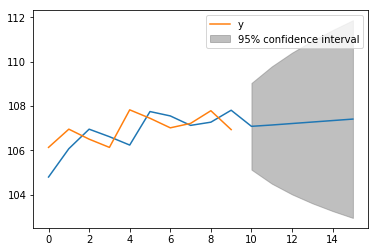

In [78]:
ar1ma1 = ARIMA(JPM.Close.dropna().values, (1,2,1)).fit()
ar1ma1.plot_predict(3010,3025,dynamic=False)

/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_wa

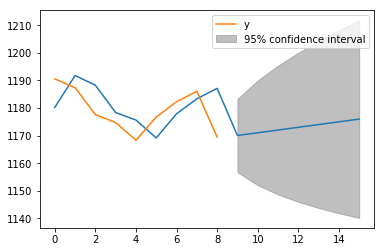

In [79]:
ar1ma1 = ARIMA(AMZN.Close.dropna().values, (1,2,1)).fit()
ar1ma1.plot_predict(3010,3025,dynamic=False)

/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_wa

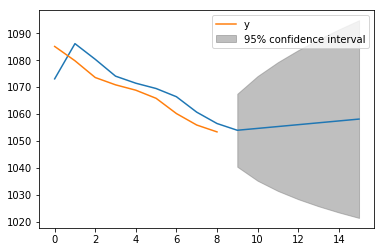

In [82]:
ar1ma1 = ARIMA(GOOGLE.Close.dropna().values, (1,2,1)).fit()
ar1ma1.plot_predict(3010,3025,dynamic=False)

/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_wa

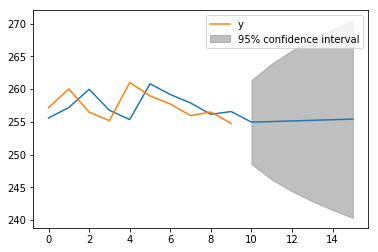

In [86]:
ar1ma1 = ARIMA(GS.Close.dropna().values, (1,2,1)).fit()
ar1ma1.plot_predict(3010,3025,dynamic=False)

/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


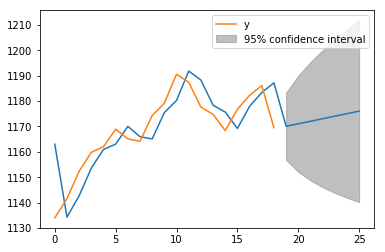

In [12]:
ar1ma1 = ARIMA(AMZN.Close.dropna().values, (1,2,1)).fit()
ar1ma1.plot_predict(3000,3025,dynamic=False)


In [96]:
#retrieving r2 scores on predicted values
scores = []
for df in dfs:
    try:
        df['close_diff_1']=df.Close.diff()
        ar1ma1 = ARIMA(df.Close.dropna().values, (1,1,1)).fit()
        score = r2_score(df.close_diff_1[1:], ar1ma1.fittedvalues)
        scores.append(score)
        print (score)
    except:
        df['close_diff_1']=df.Close.diff()
        df['close_diff_2']=df.close_diff_1.diff()

        ar1ma1 = ARIMA(df.Close.dropna().values, (1,2,1)).fit()
        score = r2_score(df.close_diff_2[2:], ar1ma1.fittedvalues)
        scores.append(score)

        print (score)


/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


0.0013440972092021441
0.48840397711407535
0.003989114508268554
0.001669196571873588
0.49721829471787216
0.5100917271961122
0.004735725752845643
0.5053127851701787
0.0017022397735872996
0.0008261229268267112
0.0027406858138184775
0.490407358915951
2.7886052878844936e-05
0.000694628822111576
0.010471685621602278
0.006726920200441966
0.0063838823168096415
0.00195462851103656
0.5032054447509366
0.003364216872787651


/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:628: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:628: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:629: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:629: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/Users/davidhoffman/ana

0.5079680849429266
0.5045457059818755
0.008571932490127221
0.020342172602282327
0.5036767275567998
0.0010592798591372299
0.4986842320334688
0.006998900860856527
0.022518202095772488


In [102]:
scores

[2.7886052878844936e-05,
 0.000694628822111576,
 0.0008261229268267112,
 0.0010592798591372299,
 0.0013440972092021441,
 0.001669196571873588,
 0.0017022397735872996,
 0.00195462851103656,
 0.0027406858138184775,
 0.003364216872787651,
 0.003989114508268554,
 0.004735725752845643,
 0.0063838823168096415,
 0.006726920200441966,
 0.006998900860856527,
 0.008571932490127221,
 0.010471685621602278,
 0.020342172602282327,
 0.022518202095772488,
 0.48840397711407535,
 0.490407358915951,
 0.49721829471787216,
 0.4986842320334688,
 0.5032054447509366,
 0.5036767275567998,
 0.5045457059818755,
 0.5053127851701787,
 0.5079680849429266,
 0.5100917271961122]

In [104]:
# Data to plot
labels = 'Python', 'C++', 'Ruby', 'Java'
sizes = [20, 50, 30]
colors = ['gold', 'yellowgreen', 'lightcoral'] #, 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()             #use may also need add this 


ValueError: 'label' must be of length 'x'

In [103]:
# Data to plot
labels = 'Python', 'C++', 'Ruby', 'Java'
sizes = [scores[0:16], scores[17:19], scores[20:]]
colors = ['gold', 'yellowgreen', 'lightcoral'] #, 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()             #use may also need add this 


ValueError: setting an array element with a sequence.

In [105]:
import plotly.plotly as py
import plotly.graph_objs as go

labels = ['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen']
values = [4500,2500,1053,500]

trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

ModuleNotFoundError: No module named 'plotly'

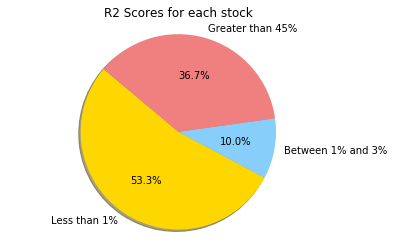

In [115]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Less than 1%', 'Between 1% and 3%' , 'Greater than 45%'
sizes = [16/30,3/30, 11/30]
colors = ['gold', 'lightskyblue', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title("R2 Scores for each stock")
plt.show()


In [123]:
def moving_average_analysis(df, short_moving, long_moving):
    short_moving=int(short_moving)
    long_moving=int(long_moving)

    switch_index = []
    short_price = 0
    long_price = 0
    count = 0
    start = 0

    
    df['short_roll'] = df.Close.rolling(window= short_moving, center=False).mean()
    df['long_roll'] = df.Close.rolling(window=long_moving, center=False).mean()

    
    
    for i in range(long_moving,df.shape[0]):
        short_price = df.short_roll[i]
        long_price = df.long_roll[i]
        
        if short_price > long_price:
            switch_index.append("s")
        else:
            switch_index.append("l")
        
    switch_dict=dict(enumerate(switch_index))
    short_price = 0
    long_price = 0
    buy_sell_dict = {}
    for i in switch_dict:
        if i == 0:
            pass
        elif switch_dict[i] == "l" and switch_dict[i - 1] == "l": 
            pass
        elif switch_dict[i] == "l" and switch_dict[i - 1] == "s":
            #print ("sell")
            buy_sell_dict[i+long_moving] = "sell"
        elif switch_dict[i] == "s" and switch_dict[i - 1] == "s":
            pass
        elif switch_dict[i] == "s" and switch_dict[i - 1] == "l":
            #print ("buy")
            buy_sell_dict[i+long_moving] = "buy"
        else:
            pass 

    
    #since it begins with a buy
    profit = 0
    purchase_price = 0
    sell_price = 0
    for i in buy_sell_dict:
        if i == sorted(buy_sell_dict.keys())[-1]:
            if buy_sell_dict[i] == "buy":
                break
        elif buy_sell_dict[i] =="buy":
            purchase_price = df.Close[i]
            #print ("purchase price",price,"profit", profit)
        elif buy_sell_dict[i]=="sell":
            sell_price=df.Close[i]
            profit += sell_price - purchase_price
            #print ("sell price", price, "profit", profit)
            #price = 0
        else:
            pass 
    #print ("profit of")
    return profit
    #add in starting price, ending price, how the index fared, transaction costs

In [124]:
five_fifty = []
for df in dfs:
    profit = moving_average_analysis(df, short_moving=5, long_moving=50)
    five_fifty.append(profit)

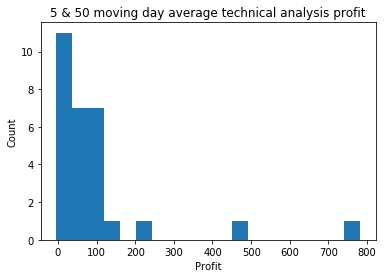

In [136]:
import matplotlib.pyplot as plt
#rng = np.random.RandomState(10)  # deterministic random data
#a = np.hstack((rng.normal(size=1000),
               #rng.normal(loc=5, scale=2, size=1000)))
plt.hist(five_fifty, bins='auto')  # arguments are passed to np.histogram
plt.title("5 & 50 moving day average technical analysis profit")
plt.xlabel("Profit")
plt.ylabel("Count")
plt.show()

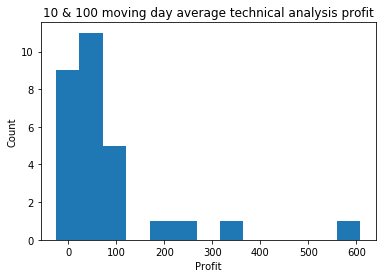

In [137]:
ten_hundred = []
for df in dfs:
    profit = moving_average_analysis(df, short_moving=10, long_moving=100)
    ten_hundred.append(profit)
    

plt.hist(ten_hundred, bins='auto')  # arguments are passed to np.histogram
plt.title("10 & 100 moving day average technical analysis profit")
plt.xlabel("Profit")
plt.ylabel("Count")
plt.show()